In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%load_ext autoreload
%autoreload 2

from data_processing.data_loader import *
from data_processing.trade_features import *
from data_processing.ob_features import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from datetime import datetime, timedelta
folder = "data"
contract = "CAKEUSDT"
start_date = datetime(2025, 4, 2)
end_date = datetime(2025, 4, 3)


trades_feature = TradeFeature(1, inc_vwap=True, inc_vwap_change=True, inc_vol=True, inc_vol_change=True, inc_taker=True, inc_taker_change=True)
volatility_feature = VolatilityFeature(10)
ob_feature = LevelOBFeature(num_levels=10, change=False, include_prices=True)
trend_feature = TrendFeature(1)

input_feature_creator = FeatureCreator([trades_feature, volatility_feature, ob_feature])
output_feature_creator = FeatureCreator([])

a, b = load_ob_and_trade_data_new(folder, contract, start_date, end_date, timedelta(seconds=60), input_feature_creator, output_feature_creator)

2025-04-02
2025-04-03


0 - 8


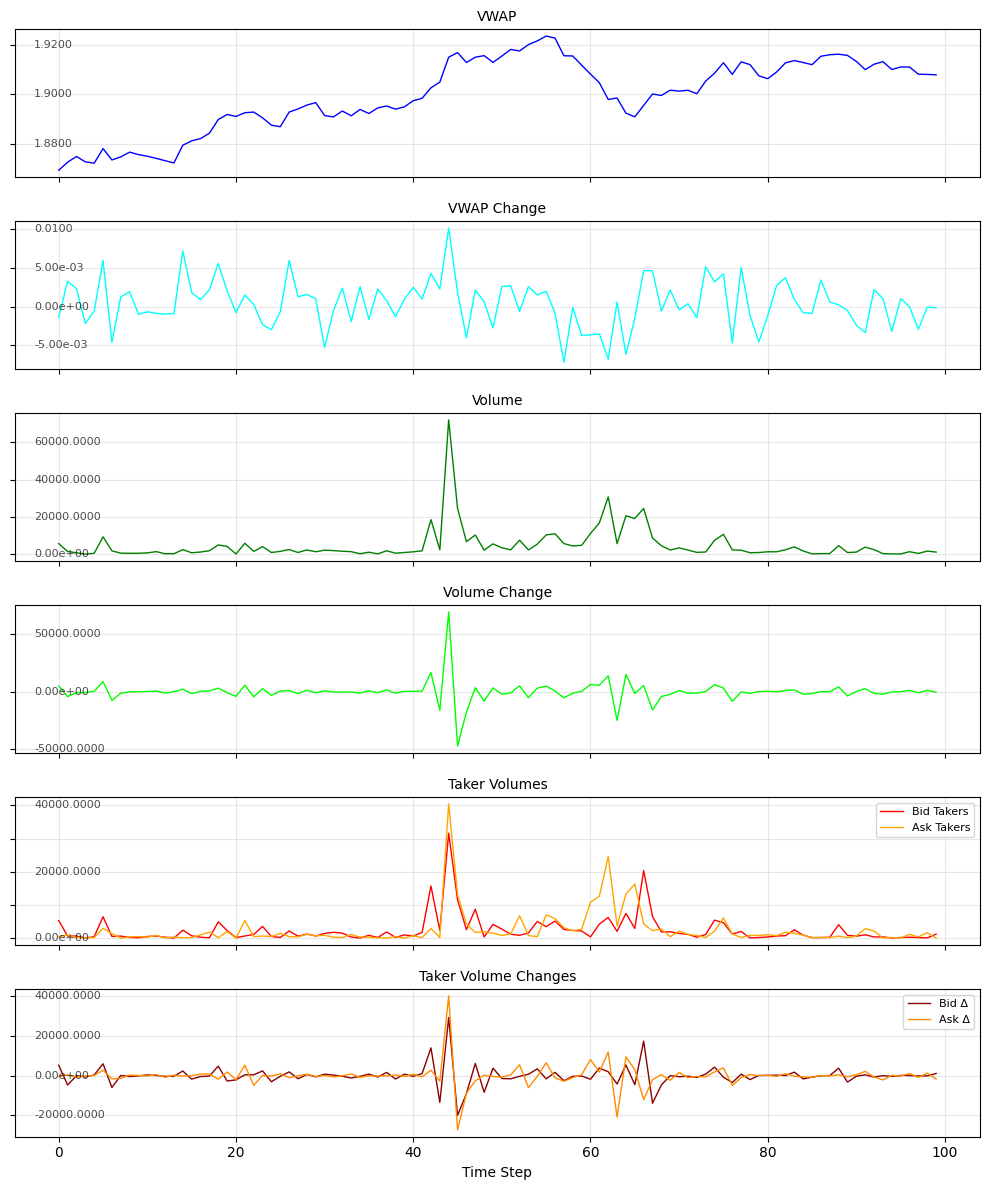

8 - 9


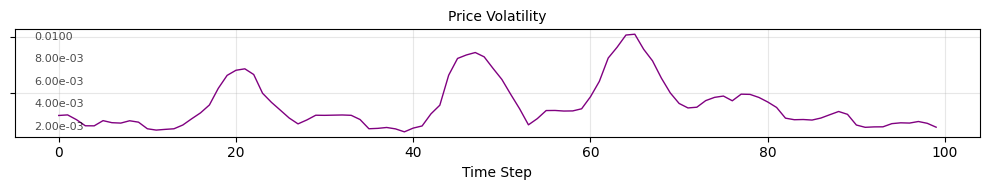

9 - 49


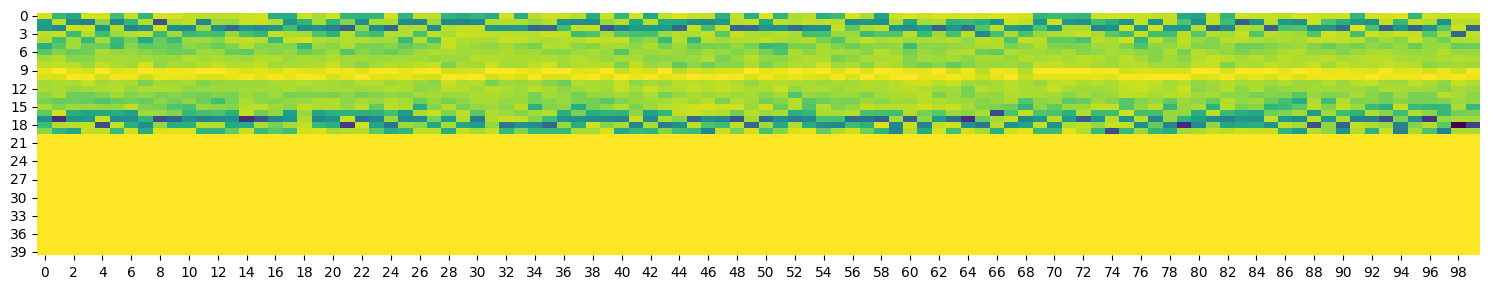

In [27]:
input_feature_creator.visualize(a[1000:1100], 0)
input_feature_creator.visualize(a[1000:1100], 1)
input_feature_creator.visualize(a[1000:1100], 2)

In [170]:
a[0]

array([  861.2505,   452.1   ,   152.1   ,   300.    ,   163.83  ,
          86.    ,     0.    ,    86.    ,  2619.5   ,  7422.5   ,
        5926.8   , 10663.    ,  6250.    ,  6284.1   ,  8363.3   ,
        5079.3   ,  6766.2   ,  2653.3   ,   643.9   ,  6889.9   ,
        7296.4   ,  6410.2   ,  7793.3   ,  5282.5   ,  8177.2   ,
       13223.2   ,  2961.9   ,  9806.6   ])

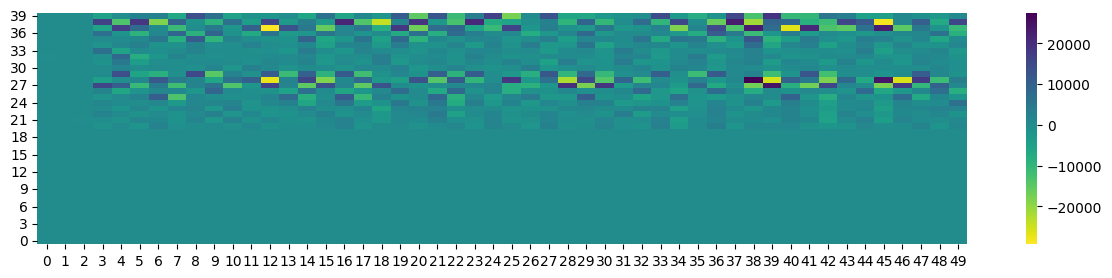

In [116]:
visualize_feature(np.array(a[:50]))